# Note :
## In this note book we will see About the ploynomial linear regression and the underfitting and the underfitting situation in ploynomial regression with respect to the degree applied on the equation

In [2]:
import numpy as np
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , SGDRegressor
from sklearn.preprocessing import PolynomialFeatures , StandardScaler
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [4]:
# let's create our own data
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)
# y = 0.8x^2 + 0.9x + 2


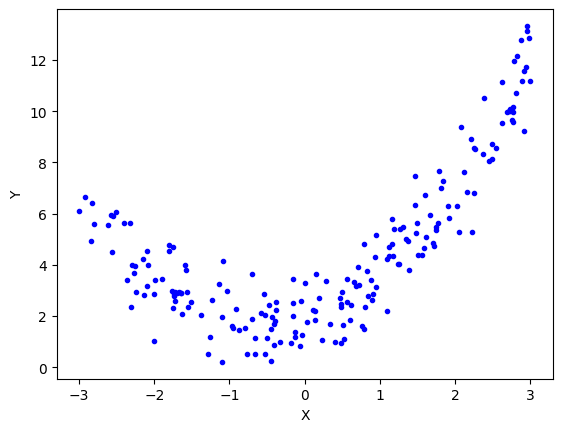

In [5]:
plt.plot(X,y,'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [6]:
# now let's apply the simple linear regression and see the what result we get
# train test split of the data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [7]:
X_train.shape,X_test.shape

((160, 1), (40, 1))

In [8]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [9]:
y_pred = lr.predict(X_test)

In [10]:
print("R2_score for the above model:",r2_score(y_test,y_pred))

R2_score for the above model: 0.47290402503414875


In [11]:
# lets check the intecep and the coffient of the model
lr.coef_ , lr.intercept_

(array([[1.03877069]]), array([4.22421411]))

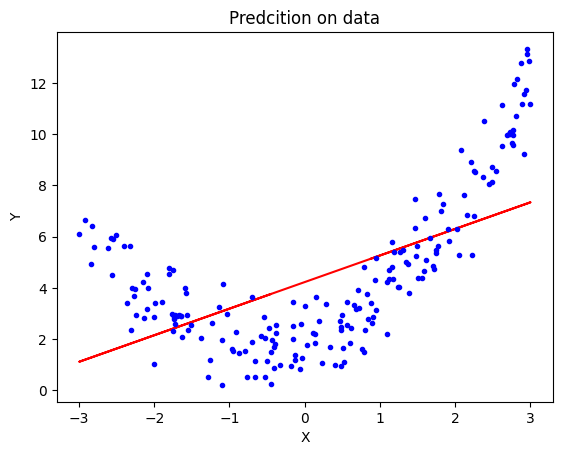

In [12]:
# let's visualize the data for the prediction line
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X,y,'b.')
plt.title("Predcition on data")
plt.ylabel("Y")
plt.xlabel("X")
plt.show()

In [13]:
# now let's apply the ploynomial feature to tranform the data into ploiynomial from
poly = PolynomialFeatures(degree= 2 ,include_bias = True)  # if include bias is fasle then X to power 0 will be not included if true then it will be included
X_train_trf = poly.fit_transform(X_train)
X_test_trf = poly.transform(X_test)

In [14]:
X_train_trf[0]

array([1.        , 0.88351312, 0.78059544])

In [15]:
# okay now again let's train the model again on the ploynomial data
rgr = LinearRegression()
rgr.fit(X_train_trf,y_train)

LinearRegression()

In [16]:
y_pred_trf = rgr.predict(X_test_trf)

In [17]:
print("R2_score after the tranformation: ",r2_score(y_test,y_pred_trf))

R2_score after the tranformation:  0.9181688401382385


## We can cleary see that the drastical improvment in the model after the transformation of the data into ploynomial

In [18]:
# new intercept ans the cofficient of the model are
rgr.intercept_,rgr.coef_

(array([2.0248199]), array([[0.        , 0.83175708, 0.7954634 ]]))

In [19]:
# now let's plot the graph for the transformed data
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = rgr.predict(X_new_poly)

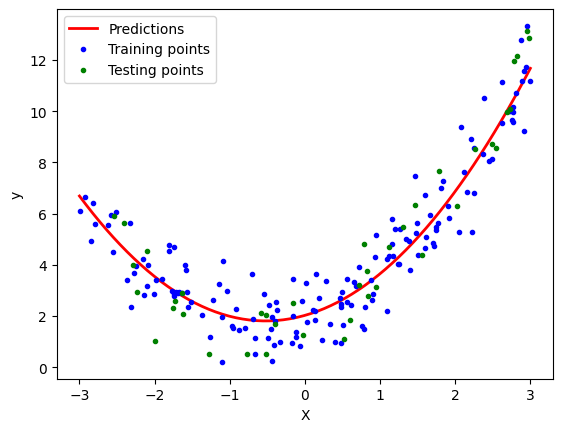

In [20]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [21]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

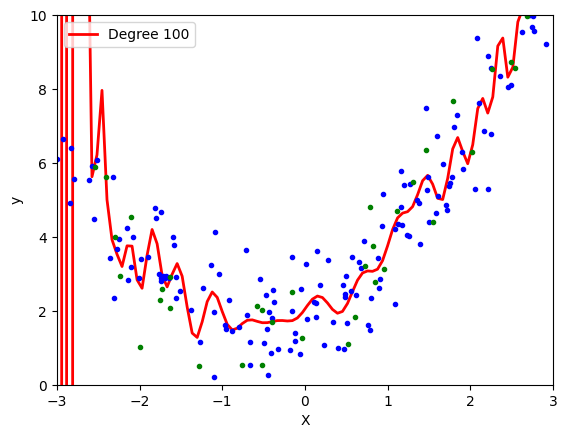

In [22]:
#function to check and visulize the degree of the polynomial feature
polynomial_regression(100)

# when we apply the gradient descent


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



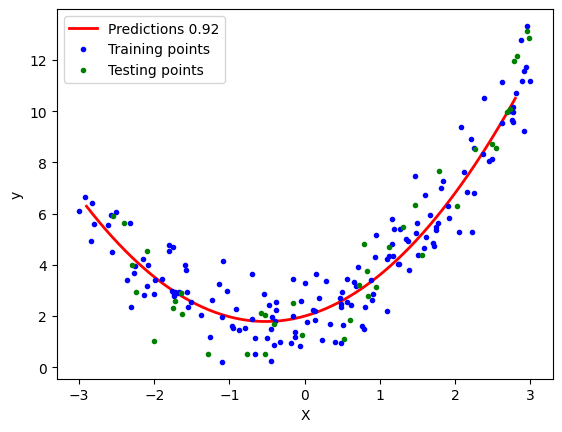

In [37]:
# Applying Gradient Descent

poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# 3D PLOYNOMIAL REGRESSION

In [23]:
# creating th eequation
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [24]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [25]:
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)

In [26]:
#When we apply simple linear regression
import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [27]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [30]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [32]:
print("Input",poly.n_features_in_)
print("Ouput",poly.n_output_features_)
print("Powers\n",poly.powers_)

Input 2
Ouput 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [ 0 13]
 [14  0]
 [13  1]
 [12  2]
 [

In [33]:
X_multi_trans.shape

(100, 496)

In [34]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [35]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [36]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()